## Time Series
- A time series is a sequential set of data points, measured typically over successive times. 
- It is mathematically defined as a set of vectors x(t), t = 0,1,2,... where t represents the time elapsed. 
- The variable x(t) is treated as a random variable. 
- The measurements taken during an event in a time series are arranged in a proper chronological order. 
- A time series containing records of a single variable is termed as univariate, and more than one variable a multivariate. 

#### Importing data

In [1]:
#libraries
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Dataset: PMS usage in Nigeria
#Unit: Liters
filename = 'Data.xlsx'
sheet ='Data'

In [5]:
#load data
data = pd.read_excel(filename, sheet_name=sheet)

In [6]:
#view top rows
data.head()

Time         Usage         Abia      Adamawa    Akwa Ibom     Anambra     Bauchi    Bayelsa       Benue        Borno  Cross River      Delta       Ebonyi         Edo      Ekiti        Enugu          FCT        Gombe        Imo     Jigawa      Kaduna          Kano     Katsina        Kogi      Kebbi       Kwara         Lagos   Nasarawa       Niger        Ogun        Ondo        Osun         Oyo     Plateau      Rivers     Sokoto   Taraba     Yobe      Zamfara
0 2012-01-01  5.835876e+08   7746926.00  15926791.00  12828870.00   4224027.0   542021.0   592995.0   4912790.0  10295904.79  19011386.00  25101830.0  1728705.00   8459061.0   761011.0  19711249.21  29448163.00   2692264.00  2554539.0   537007.0  31251678.00  21373197.38  24422913.0   2906000.0  1062991.0  28235590.0  2.067670e+08  1256012.0  18080691.0  28706335.0   5463471.0   1829297.0   9944906.0   6487017.0   4202043.0   516016.0  6239363   886017  16881558.23
1 2012-02-01  9.196481e+08   5705605.00  24436420.00  12958480.00   4390265.0   601013.0  1206023.0  25290130.0  28123486.75  15948892.00  17933010.0  3493662.00  23306608.0  1033010.0  38482123.05  57494645.62   4674042.00  2039467.0   434013.0  54407270.00  44260432.59   4168094.0   4342681.0  1687937.0  32095583.0  2.912730e+08  1312005.0  36465289.0  48370052.0  14259207.0  15312578.0  64465821.0  11153135.0   8047514.0  1158019.0  1334966  1919027  16064542.00
2 2012-03-01  9.022804e+08  14130734.00  40174133.00   5626185.00   7444092.0  1430853.0  1235990.0  36678783.0  30038076.13  13272163.00   4401965.0  3519858.00  14540469.0  1702046.0  22216665.00  53113024.00   5003961.00  3802536.0  1209004.0  42066541.43  39526222.59   6645197.0   4378032.0  3285135.0  13945132.0  2.793437e+08  1854860.0  41853647.0  57579850.0  12824386.0  18579627.0  67038103.0  18201676.0  13844530.0  1559909.0  2236959  1793003  16183326.00
3 2012-04-01  9.511933e+08  22674053.00  54201584.00  36800858.00  13006216.0  1799857.0  1623238.0  24349012.0  22103574.00  10894624.00   9163864.0  3147440.00   5898620.0  2318033.0  24691203.00  37266720.00   7241549.00  6454370.0   905005.0  41814269.00  36878260.12   7268067.0   6409880.0  3484005.0  12643381.0  3.605163e+08  3022896.0  27925627.0  43405341.0  12022044.0  16065708.0  47431517.0  16987621.0  17339043.0  1878008.0  1955511  1525109   8080955.00
4 2012-05-01  9.615251e+08  11179295.68  15742755.89  29101214.64   8647885.0  1654017.0  1662994.0  38055054.0  21419542.00   9940032.27  11657022.0  1504912.01   6655426.0  2794051.0  12850205.00  48415029.56  10440723.65  5823012.0  1886009.0  71619287.00  45100215.07   5157488.0  10569988.0  2457936.0  19053546.0  3.661386e+08  3497028.0  29381604.0  32707880.0  13277059.0  12472980.0  64281055.0  17582452.0   8469881.0  2177032.0  1404032  2268849  14479008.00

In [7]:
data.columns

Index(['Time', 'Usage', 'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River', 'Delta ', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna ', 'Kano', 'Katsina', 'Kogi', 'Kebbi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype='object')

In [8]:
#create dataframe for time series
#usage is the total usage across all states in Nigeria
df = data.iloc[:,:2]
#rename columns
df.columns = ['year','usage']
#view top rows
print(df.head())
print('---------------------------')
#view bottom rows
print(df.tail())

        year         usage
0 2012-01-01  5.835876e+08
1 2012-02-01  9.196481e+08
2 2012-03-01  9.022804e+08
3 2012-04-01  9.511933e+08
4 2012-05-01  9.615251e+08
---------------------------
         year         usage
79 2018-08-01  1.615628e+09
80 2018-09-01  1.468656e+09
81 2018-10-01  1.671348e+09
82 2018-11-01  1.725813e+09
83 2018-12-01  1.768579e+09


In [9]:
#statistical summary of data
df.describe().T

count          mean           std           min           25%           50%           75%           max
usage   84.0  1.193855e+09  3.102208e+08  5.835876e+08  9.314033e+08  1.167115e+09  1.474519e+09  1.863857e+09

In [10]:
#time range
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 2012-01-01 00:00:00
Time period end: 2018-12-01 00:00:00


#### Data Preprocessing and Visualization

In [11]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    84 non-null     datetime64[ns]
 1   usage   84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [13]:
#data shape
print('There are {} number(s) of rows and {} number(s) of columns'.format(df.shape[0],df.shape[1]) )

There are 84 number(s) of rows and 2 number(s) of columns


In [14]:
#converting to datetime format
#setting index as the datetime column for easier manipulations
y = df.set_index('year')

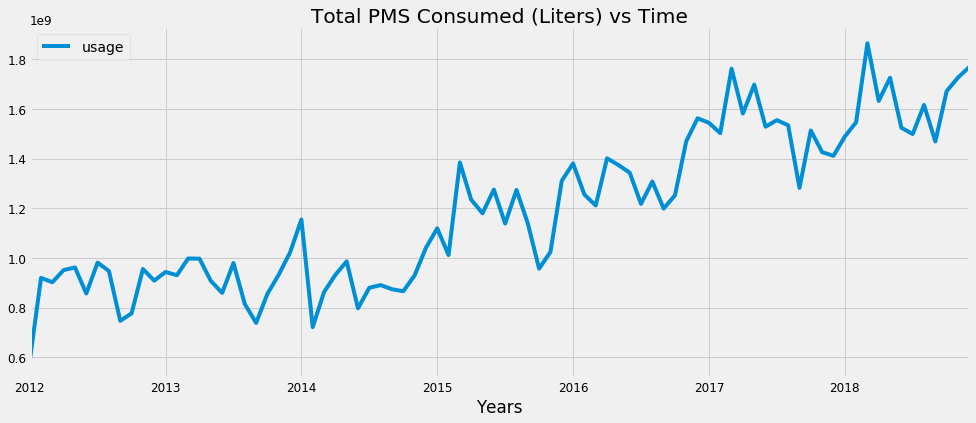

In [15]:
#data visualization
y.plot(figsize=(15, 6))
plt.title('Total PMS Consumed (Liters) vs Time')
plt.xlabel('Years')
plt.show()

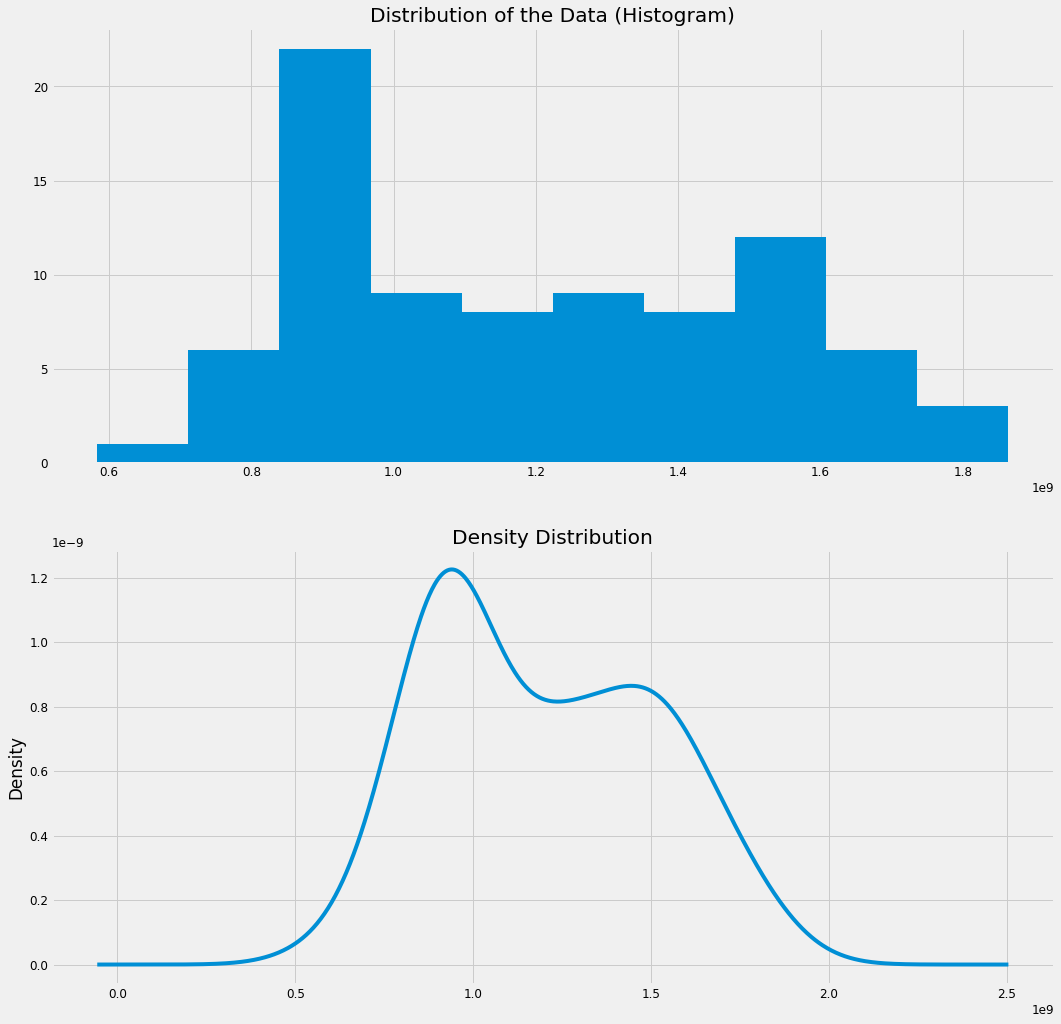

In [16]:
#examining data distribution
plt.figure(1, figsize= (16,16))
plt.subplot(211)
plt.title('Distribution of the Data (Histogram)')
y.usage.hist()
#add bottom space
plt.subplots_adjust(bottom  = 0.05)    
plt.subplot(212)
plt.title('Density Distribution')
y.usage.plot(kind='kde')
plt.show()

The distribution is Guassian-like, however, could be transformed towards model improvement

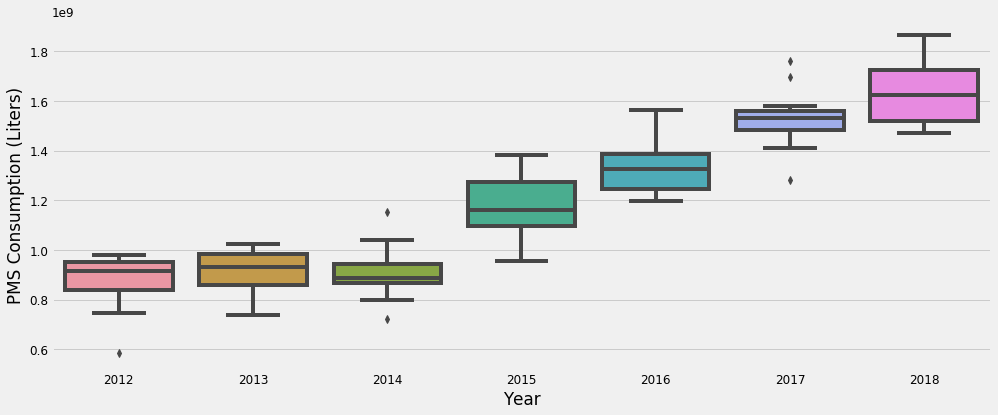

In [17]:
#box plot
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.usage.index.year, y.usage, ax=ax)
plt.xlabel('Year')
plt.ylabel('PMS Consumption (Liters)')
plt.show()

The increasing median values across years confirms an upwards trend.

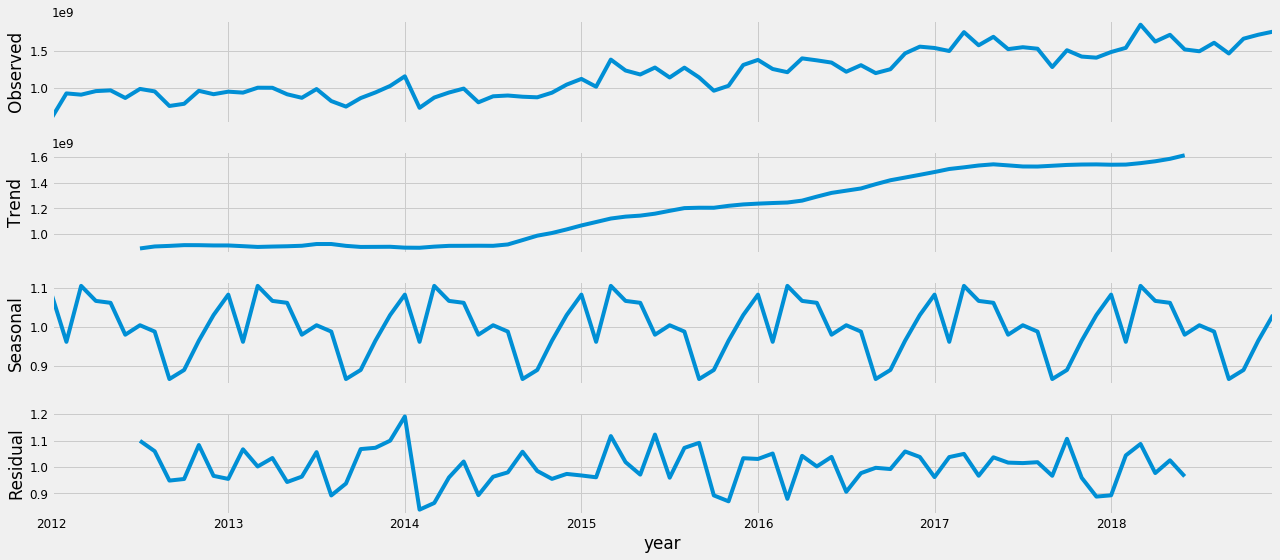

In [18]:
#Decomposing using statsmodel
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. the above chart shows the trend, seasonal, and residual components of our data.

#### Test for Stationarity
- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the Time Series is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

In [19]:
#libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

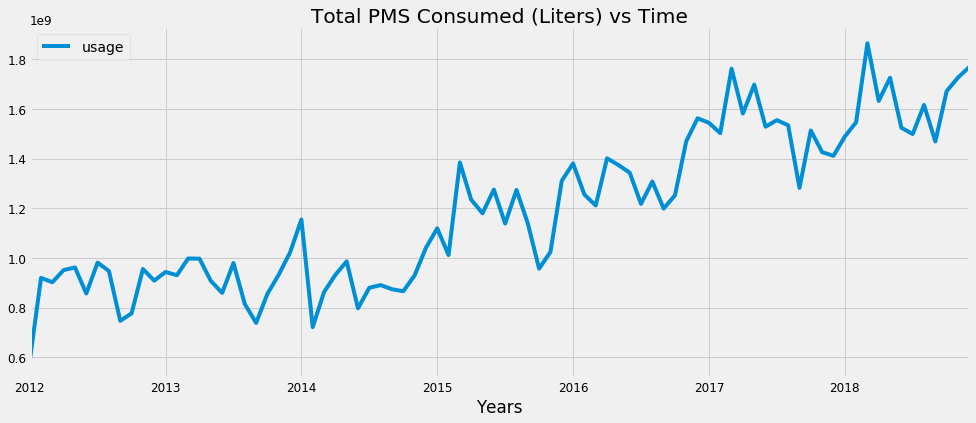

In [20]:
#data visualization
y.plot(figsize=(15, 6))
plt.title('Total PMS Consumed (Liters) vs Time')
plt.xlabel('Years')
plt.show()

__We can check stationarity using the following:__

- __Plotting Rolling Statistics__: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- __Augmented Dickey-Fuller Test:__ This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

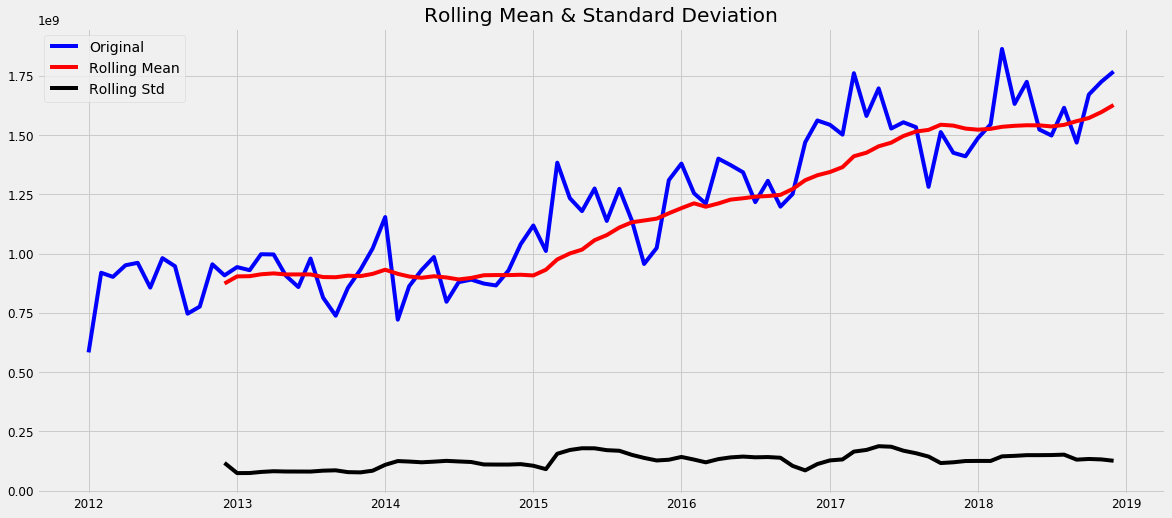

In [21]:
#Determing rolling statistics
rolmean = y.rolling(12).mean()
rolstd = y.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above visualization, it is evident that the time series is not stationary as the rolling mean increases over time. 

In [22]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.usage, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  0.527541
p-value                         0.985687
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


Also, the interpretation of the Dickey-Fuller Test signifies that we cannot reject the null hypothesis as the Test Statistic is greater than the Critical value, and the p-value is also significantly higher than 0.05

In [23]:
#chaining the stationarity test into a single function

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#### Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time. For eg, in this case there is an increase in PMS consumption in over time.
2. __Seasonality__ – variations at specific time-frames. eg the time series shows a sharp drop in PMS consumption around december yearly.

#### Differencing
- In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 
- First order differencing in Pandas

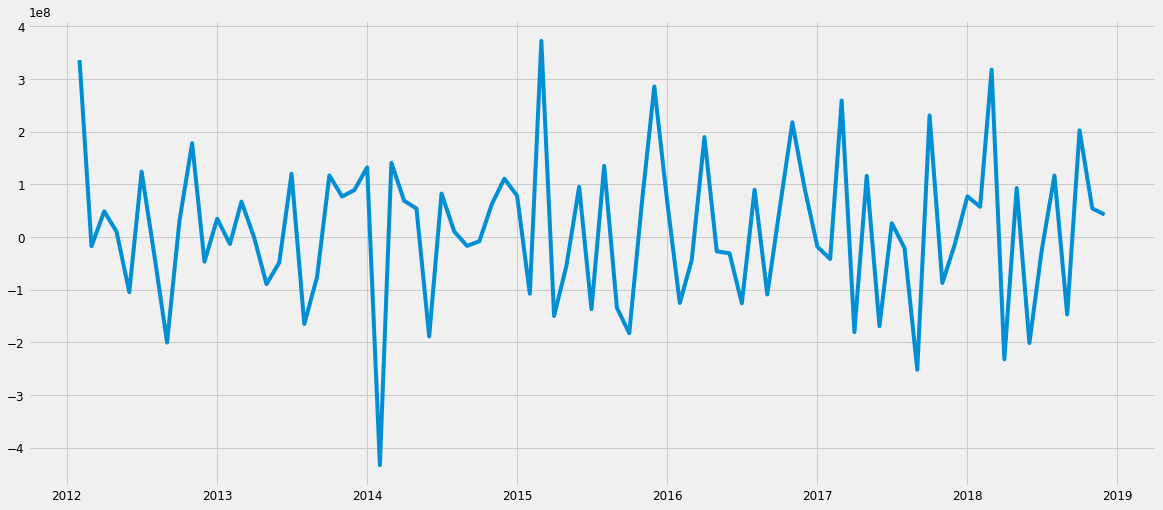

In [24]:
#evaluating differencing
ts_diff = y.usage - y.usage.shift()
plt.plot(ts_diff)
plt.show()

In [25]:
#droping null values, as the first value differencing is not evaluated
ts_diff.dropna(inplace=True)

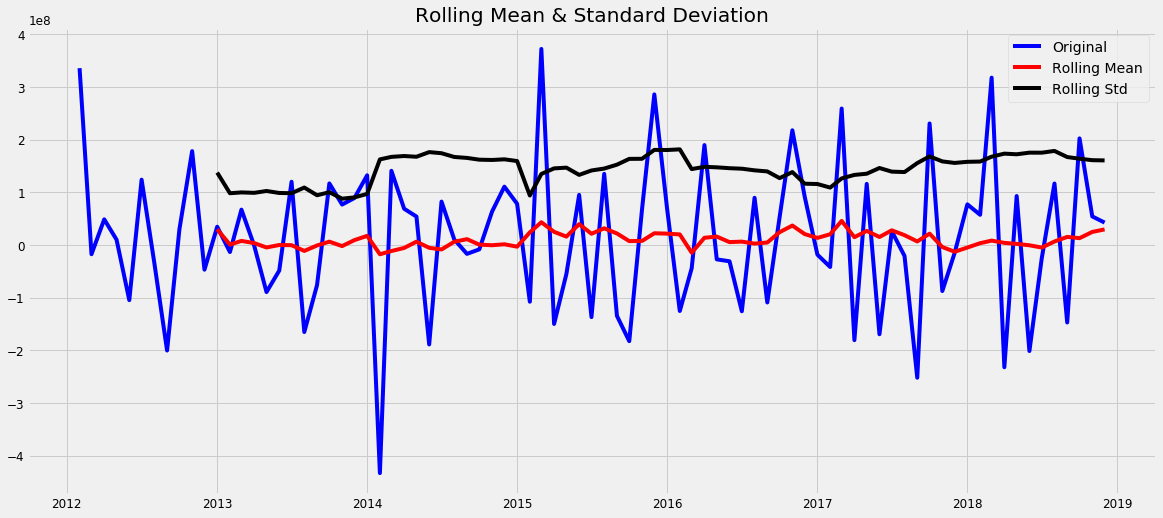

Results of Dickey-Fuller Test:
Test Statistic                 -2.788921
p-value                         0.059874
#Lags Used                     11.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [26]:
#Repeating stationarity test
test_stationarity(ts_diff)

The result from the above tests show that the time series is now stationary and can be modeled approriately.

####  Time Series forecasting

In [27]:
#libraries
import datetime
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet
from math import sqrt
from random import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [28]:
#function for evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_forecast(y,pred):
    results = pd.DataFrame({'mean_absolute_error':mean_absolute_error(y, pred),
                           }, index=[0])
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y.values, pred.values)
    results['rmse'] = np.sqrt(results['mse'])
    return results

## Autoregressive Integrated Moving Average (ARIMA)
In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- __Number of Differences (d):__ d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value. 

<br>__Observations from Exploratory Data Analysis on the time series:__
- Non stationarity implies at least one level of differencing (d) is required in ARIMA
- [The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots](https://people.duke.edu/~rnau/411arim3.htm)

[Tuning ARIMA parameters](https://machinelearningmastery.com/tune-arima-parameters-python/)


Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

#### ACF Plot

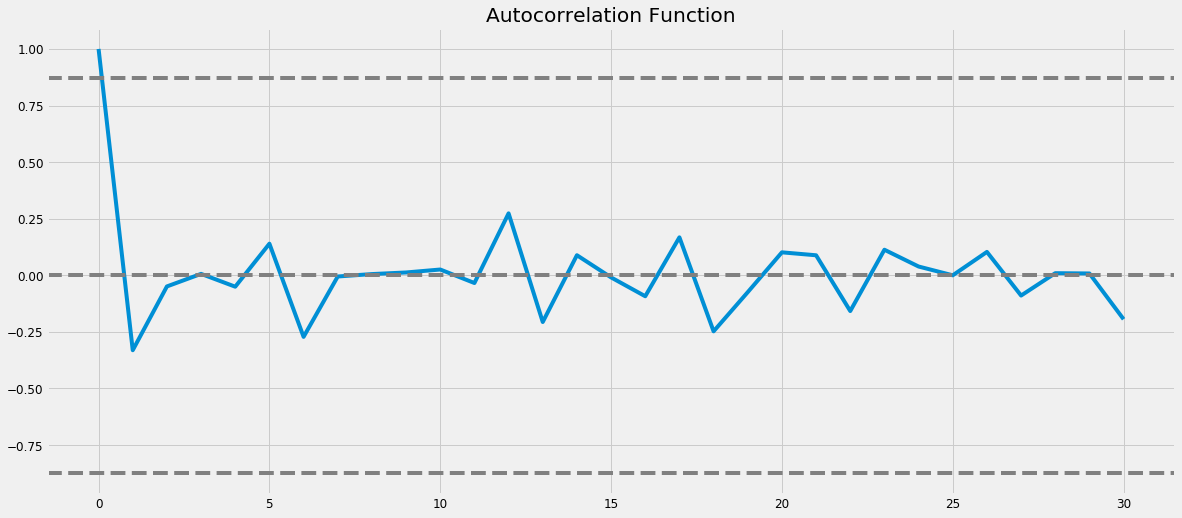

In [29]:
plt.plot(np.arange(0,31), acf(ts_diff, nlags = 30))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#### PACF Plot

In [30]:
plt.plot(np.arange(0,31), pacf(ts_diff, nlags = 30))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

From the ACF plot, the curve cuts the upper boundary at lag = 1, hence the optima q parameter is 1, similarly, the PACF curve falls below zero at lag = 1 and the optima p parameter is 1. Finally, the times series was differenced once, i.e, d = 1.

q=1 , p=1, d=1


#### Train Validation set split

In [31]:
#validation and forecast range
start_year = 2017
start_month = 4
end_year = 2028
end_month = 12
future = [datetime.date(m//12, m%12+1, 1) for m in range(start_year*12+start_month-1, end_year*12+end_month)]

In [32]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]
train_diff = train - train.shift()
#future = pd.date_range('2017-04-01', periods=45, freq ='M') #up to december 2020

#plotting the data
train['usage'].plot(label='Train')
valid['usage'].plot(label='Validate')
plt.show()

#### Residuals

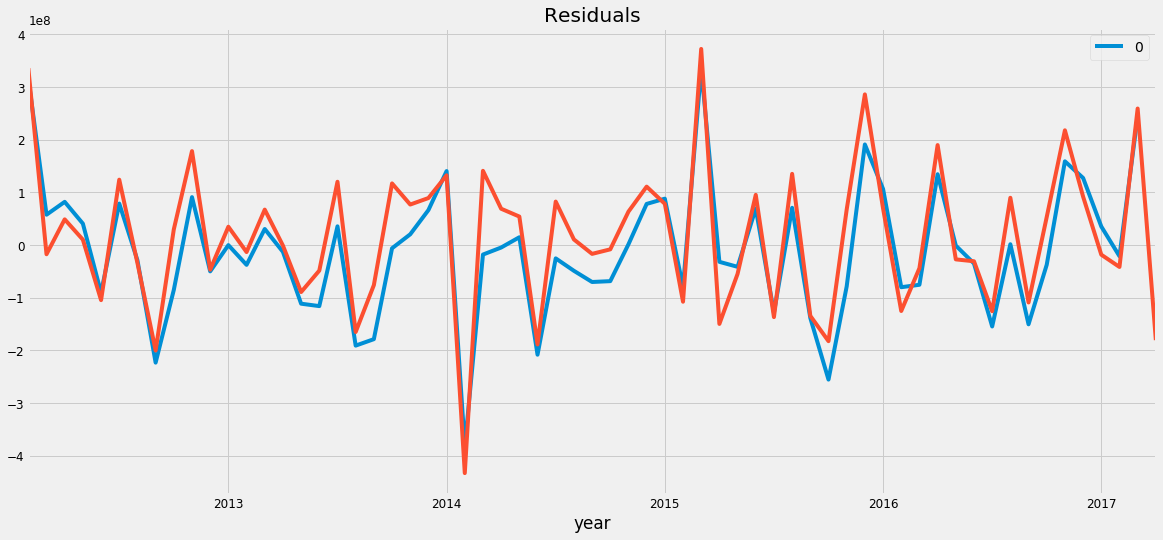

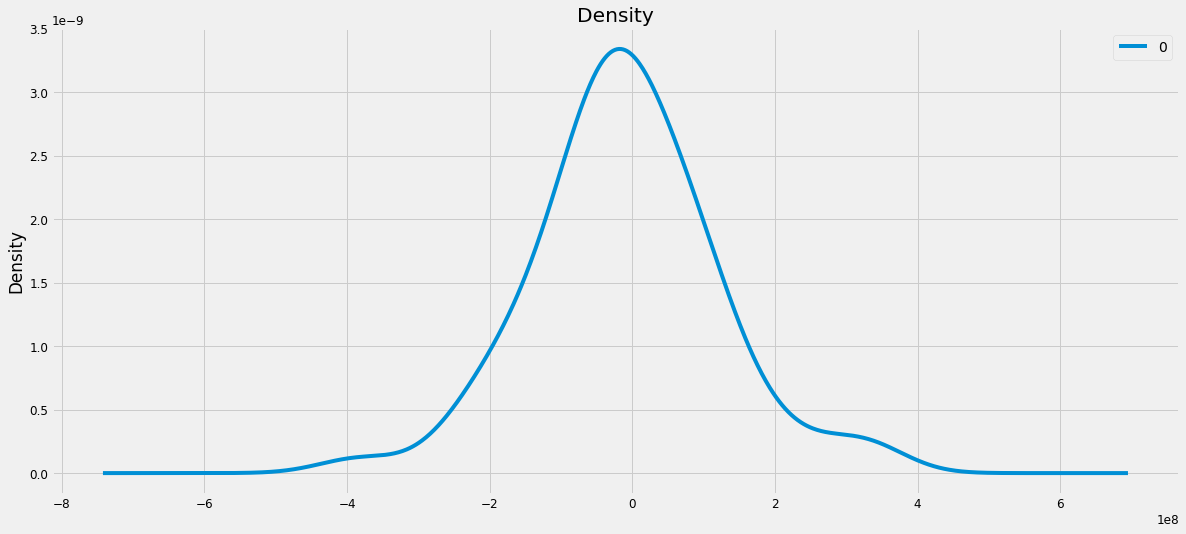

In [33]:
# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=1)

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
ts_diff[:len(train)].plot()
residuals.plot(kind='kde', title='Density' )
plt.show()

#### Validation and Forecast

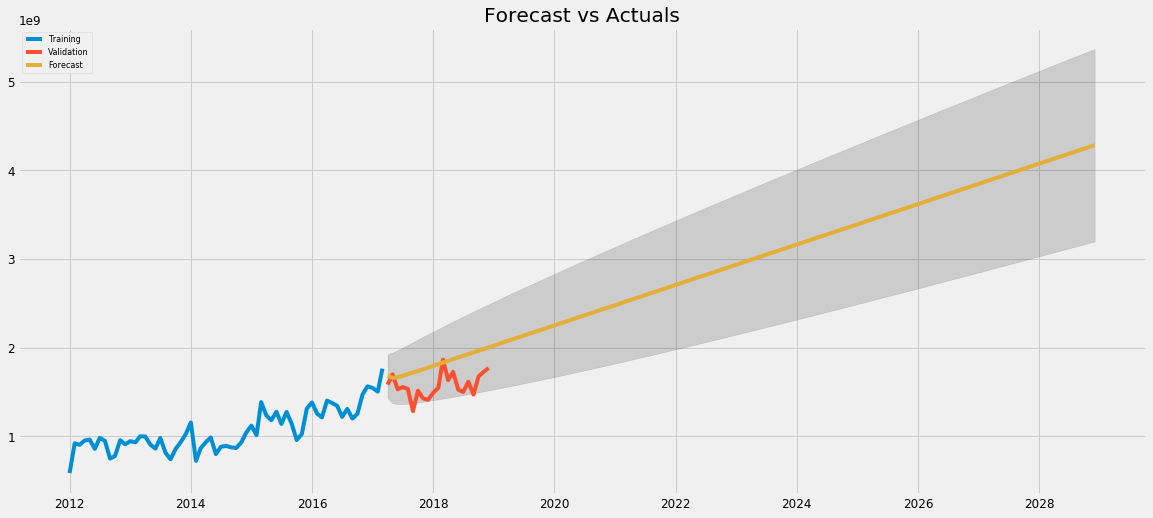

In [35]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

#model_fit.plot_predict(dynamic=False)

# Forecast
fc, se, conf = fitted.forecast(141, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=future)
lower_series = pd.Series(conf[:, 0], index=future)
upper_series = pd.Series(conf[:, 1], index=future)

# Plot
#plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(valid, label='Validation')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Model Results and Summary 

In [36]:
#model summary
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.usage   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1244.632
Method:                       css-mle   S.D. of innovations      126098045.233
Date:                Wed, 24 Jun 2020   AIC                           2497.264
Time:                        05:23:54   BIC                           2505.773
Sample:                    02-01-2012   HQIC                          2500.605
                         - 03-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            1.9e+07   1.32e+07      1.442      0.154   -6.82e+06    4.48e+07
ar.L1.D.usage     0.3355      0.251      1.337      0.186      -0.156       0.828
ma.L1.D.usage    -0.7617      0.263     

In [37]:
#validation time period
start_index = valid.index.min()
end_index = valid.index.max()

In [38]:
#set time as index
fc_series = fc_series.reset_index().set_index('index')

In [39]:
#evaluate forecast
evaluate_forecast(y[start_index:end_index], fc_series[start_index:end_index])

mean_absolute_error  median_absolute_error           mse     msle       mape          rmse
0         2.483370e+08           2.568487e+08  7.668804e+16  0.02779  16.325786  2.769261e+08

## Time Series with Prophet
- [Prophet](https://facebook.github.io/prophet/) is open source software released by Facebook's Core Data Science team.
- Prophet is a procedure for forecasting time series data based on an additive/multiplicative model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
- It works best with time series that have strong seasonal effects and several seasons of historical data. 
- Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
- The Prophet package provides intuitive parameters which are easy to tune. 


__Trend parameters__

- growth: 'linear' or 'logistic' to specify a linear or logistic trend
- changepoints:	List of dates at which to include potential changepoints (automatic if not specified)
- n_changepoints: If changepoints in not supplied, you may provide the number of changepoints to be automatically included
- changepoint_prior_scale: Parameter for changing flexibility of automatic changepoint selection
 

__Seasonality and Holiday Parameters__

- yearly_seasonality: Fit yearly seasonality
- weekly_seasonality: Fit weekly seasonality
- daily_seasonality: Fit daily seasonality
- holidays: Feed dataframe containing holiday name and date
- seasonality_prior_scale: Parameter for changing strength of seasonality model
- holiday_prior_scale: Parameter for changing strength of holiday model

Prophet requires the variable names in the time series to be:

- y – Target
- ds – Datetime

In [40]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.usage.values

In [41]:
#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True, seasonality_mode = 'multiplicative')

#fit the model with your dataframe
model.fit(train_prophet) #fit the model with your dataframe

#generate future time range till Dec-2020
future = model.make_future_dataframe(periods = 141, freq = 'MS')

#view bottom five
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
199 2028-08-01
200 2028-09-01
201 2028-10-01
202 2028-11-01
203 2028-12-01

#### Forecast

In [42]:
#forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
199 2028-08-01  3.588639e+09  3.097259e+09  4.116450e+09
200 2028-09-01  3.106518e+09  2.674526e+09  3.584933e+09
201 2028-10-01  3.296782e+09  2.820842e+09  3.812614e+09
202 2028-11-01  3.868562e+09  3.315307e+09  4.461049e+09
203 2028-12-01  3.965837e+09  3.398229e+09  4.563704e+09

In [43]:
#set time as index
forecast.set_index('ds', inplace=True)

#### Model Results and Validation

In [44]:
#fig = model.plot(forecast)
#plot the predictions for validation set
#plt.plot(y)

#plt.plot(valid, label='Valid', color = 'red', linewidth = 2)

#plt.show()


fc_series = forecast[len(train):].yhat
lower_series = forecast[len(train):].yhat_lower
upper_series = forecast[len(train):].yhat_upper

# Plot
#plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(valid, label='Validation')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

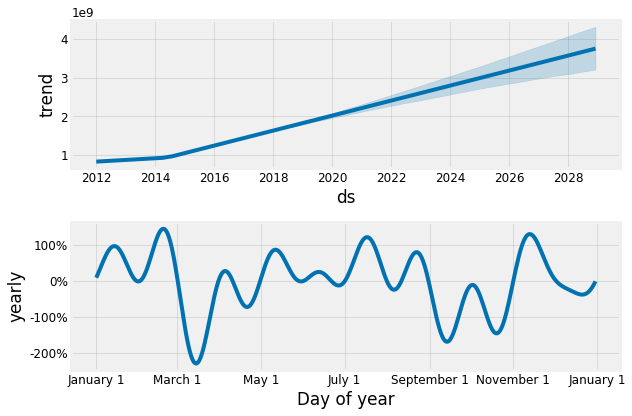

In [45]:
#model components
forecast_ = forecast.reset_index()
model.plot_components(forecast_);

In [46]:
#making data frame
y_prophet = pd.DataFrame()
y_prophet['ds'] = y.index
y_prophet['y'] = y.usage.values

In [47]:
#setting time as index
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast

In [48]:
#evaluate forecast
evaluate_forecast(y_prophet.y[start_index:end_index], forecast_prophet.yhat[start_index:end_index])

mean_absolute_error  median_absolute_error           mse      msle      mape          rmse
0         1.218801e+08           1.208746e+08  2.157800e+16  0.008373  7.936488  1.468945e+08

#### Summary

The results from both the Prophet and ARIMA model resulted in a rmse of 146 million liters yearly. However, the mean absolute percentage error for the Prophet model is 7.9% which is relatively lower to 11.2% from the ARIMA model. This indicates that the Prophet model was able to capture the seasonalities in the time series.